In [1]:
import numpy as np
import pandas as pd
import rdkit.Chem as Chem
from rdkit.Chem import Descriptors
import numpy as np
import sys
import rdkit.Chem.Crippen as Crippen
import rdkit.Chem.rdMolDescriptors as MolDescriptors
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
import pickle
import logging

RDKit WARNING: [14:41:48] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
sys.path.insert(0,'./Modules/')
from rewards import bunch_evaluation

In [3]:
from rewards import get_padel, clean_folder
def get_pIC50(mols):
    folder_path =  "./generated_molecules/"
    file_path = "./descriptors.csv"
    
    #Cleaning up the older files
    clean_folder(folder_path)
    
    i = 0
    for mol in mols:
        print(Chem.MolToMolBlock(mol),file=open(str(folder_path)+str(i)+'.mol','w'))
        i += 1
    get_padel(folder_path,file_path)
      #Reading the descriptors
    X = pd.read_csv(file_path)
    #Filling Null Values
    X.fillna(value=0,inplace=True)
    X.Name = pd.to_numeric(X.Name, errors='coerce')
    X.sort_values(by='Name',inplace=True)
    X.to_csv('./try.csv',index=False)
    #Removing the columns with zero variance in original data
    with open('./saved_models/drop.txt','rb') as fp:
        bad_cols = pickle.load(fp)
    X_step1 = X.drop(columns=bad_cols,inplace=False)
    X_step2 = X_step1
    
    
    
    #Doing StandardScaler() as applied to original data
    with open('./saved_models/new_scaler.pkl','rb') as fp:
        scaler = pickle.load(fp)
    X2 = scaler.transform(X_step2.astype('float64'))
    X_step3 = pd.DataFrame(data=X2,columns=X_step2.columns)
    
    #X.head()
    #Dropping columns with low correlation with pIC50
    
    # =============================================================================
    #     X.to_csv('./X.csv',index=False)
    #     X_step1.to_csv('./X_step1.csv')
    #     X_step2.to_csv('./X_step2.csv')
    #     X_step3.to_csv('./X_step3.csv')
    # =============================================================================
    
    
    
    #Using the Random forest Predictor
    with open('./saved_models/new_RFR.pkl','rb') as fp:
        pp = pickle.load(fp)
    predictions = pp.predict(X_step3)
    
    print('Properties predicted for {} molecules'.format(len(predictions)))
    return predictions

In [4]:
df = pd.read_excel('./Generated molecules/AKT_trial.xlsx')

In [5]:
df.head()

,Smiles,pChEMBL_Value
0,Cc1nc(NC(=O)N2CC[C@H](O)[C@H]2C(N)=O)sc1-c1csc...,6.75
1,CCCN(C)Cc1ccc(-c2nnc3n2-c2cccnc2Nc2ccccc2-3)cc1,5.60
2,Cc1nc(N)nc(-c2c(Nc3cc[nH]n3)nc3ccc(-c4cccc(F)c...,7.14
3,CNS(=O)(=O)c1ccc(C(=O)N2CCOc3ccc(-c4ccc5nc[nH]...,6.09
4,NC[C@@H](Cc1ccccc1)NC(=O)c1cc(Br)c(-c2ccnc3[nH...,5.22


In [6]:
img = (ch.MolFromSmiles(df.iloc[1,0]))
mol2 = ch.MolFromSmiles(df.iloc[1,1])

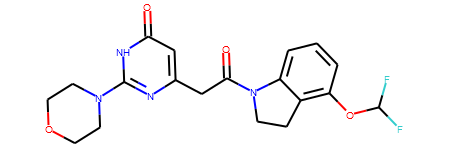

In [7]:
img

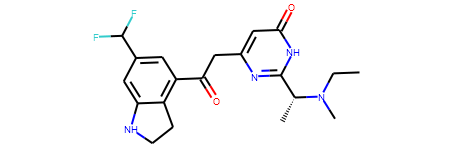

In [8]:
mol2

In [9]:
mol = []
for smile in df['Initial']:
    mol.append(ch.MolFromSmiles(smile))

In [10]:
logP = []
mw = []
tpsa = []
ss = []
for molecule in mol:
    logP.append(Crippen.MolLogP(molecule))
    mw.append(MolDescriptors.CalcExactMolWt(molecule))
    tpsa.append(Descriptors.TPSA(molecule))
df['logP'] = np.asarray(logP)
df['MW'] = np.asarray(mw)
df['tPSA'] = np.asarray(tpsa)
df['SweetSpot'] = ((3<df['logP']) & (df['logP']<5)& (320<df['MW']) & (df['MW']<420) & (80<df['tPSA']) & (df['tPSA']<110))
df['SweetSpot'].describe()

count       316
unique        1
top       False
freq        316
Name: SweetSpot, dtype: object

In [11]:
mol = []
for smile in df[' Modified']:
    mol.append(ch.MolFromSmiles(smile))
logP = []
mw = []
tpsa = []
ss = []
for molecule in mol:
    logP.append(Crippen.MolLogP(molecule))
    mw.append(MolDescriptors.CalcExactMolWt(molecule))
    tpsa.append(Descriptors.TPSA(molecule))
df['logP'] = np.asarray(logP)
df['MW'] = np.asarray(mw)
df['tPSA'] = np.asarray(tpsa)
df['SweetSpot'] = ((3<df['logP']) & (df['logP']<5)& (320<df['MW']) & (df['MW']<420) & (80<df['tPSA']) & (df['tPSA']<110))
df['SweetSpot'].describe()

count       316
unique        2
top       False
freq        302
Name: SweetSpot, dtype: object

In [12]:
new_df = df.loc[df.SweetSpot==True]

In [19]:
mol1 = (ch.MolFromSmiles(new_df.iloc[1,0]))
mol2 = ch.MolFromSmiles(new_df.iloc[1,1])

In [14]:
print(img)

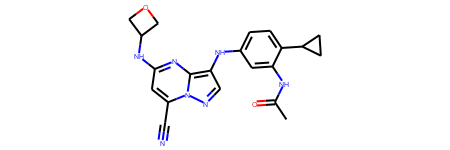

In [18]:
img

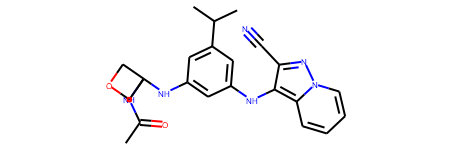

In [20]:
mol2

In [18]:
import sys
sys.path.insert(0, './Modules/')

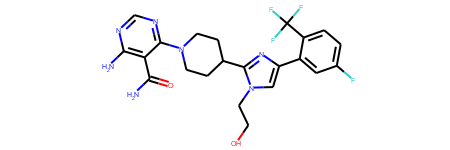

In [3]:
import rewards
import pandas as pd
import rdkit.Chem as ch
df = pd.read_csv('./out153.csv',engine="python")
mol = ch.MolFromSmiles(df.iloc[0,0])
mol

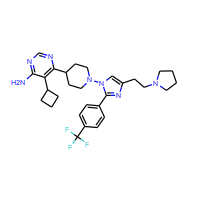

In [5]:
from rdkit.Chem import Draw
ch.Draw.MolsToImage([mol], subImgSize=(200, 200))

In [4]:
df.head()

,Initial molecule,Modified molecule
0,NC(=O)c1c(N)ncnc1N1CCC(c2nc(-c3cc(F)ccc3C(F)(F...,CC(=O)Nc1c(N)ncnc1N1C[C@H]2C[C@@]2(c2nc(-c3nc...
1,CCc1c(N)ncnc1N1CCC(c2nc(-c3cc(F)ccc3Cl)cn2CCN2...,CCCCCCOn1nc(N)nc1N1CCCC(c2cc(-c3nc(F)cn3Cl)cc...
2,Cc1ccc(-c2c(N)ncnc2N2CCC(c3nc(-c4cc(F)ccc4C(F)...,Cc1ccc(-c2c(N)ncnc2N2C[C@H]3C[C@@]3(c3nc(-c4c...
3,CCN(CC)c1nccc(-c2sc(C(=O)N[C@H]3CCCN3C(N)=O)nc...,NCc1c(-c2nc(NCCCCO)ncc2)cc(C(=O)N[C@H]2CCCN2C...
4,CCOc1ccc(Nc2nc3ccccn3c2-c2nc(C)nc(N)n2)cn1,CCOc1ccc(Nc2c(-c3nc(C#N)nc(I)n3)n3ccccc3n2)cn1


In [5]:
from rewards import bunch_evaluation
moli = []
molm = []
for i in range(len(df)):
    moli.append(ch.MolFromSmiles(df.iloc[i,0]))
    molm.append(ch.MolFromSmiles(df.iloc[i,1]))

In [6]:
ini = bunch_evaluation(moli)
mod = bunch_evaluation(molm)

Properties predicted for 305 molecules
 Evaluations completed
Properties predicted for 305 molecules
 Evaluations completed


In [27]:
ini = np.asarray(ini)
mod = np.asarray(mod)

In [ ]:
#remember to change pIC50 conversion depending on the reward function

In [28]:
changes = pd.DataFrame(data=np.transpose(np.asarray([(mod[:,1]*3+7),(ini[:,1]*3 +7)])),columns=['Modified','Initial']) 

In [29]:
changes.head()

,Modified,Initial
0,6.839906,7.133250
1,7.661039,8.094989
2,6.992800,6.307453
3,6.822444,7.555533
4,7.056073,7.114760


In [31]:
changes['Delta'] = changes['Modified'] - changes['Initial']
changes.sort_values(by='Delta',ascending=False,inplace=True)

In [57]:
inact_to_act = changes.loc[(changes['Modified']>7) & (changes['Initial']<7),['Modified','Initial','Delta']].sort_values(by='Delta',ascending=False)

In [43]:
changes.head(10)

,Modified,Initial,Delta
61,6.266838,3.624936,2.641902
168,6.746200,4.602422,2.143778
50,6.433924,4.540926,1.892998
122,6.191000,4.602422,1.588578
21,5.850533,4.561467,1.289067
84,6.393654,5.201288,1.192366
207,7.537467,6.352000,1.185467
42,7.314333,6.138750,1.175583
68,7.505867,6.352000,1.153867
210,8.129183,7.102867,1.026317


In [44]:
changes.to_csv('./out153_pIC.csv',index=False)

In [60]:
inact_to_act.to_csv('./act_pIC153.csv',index=False)

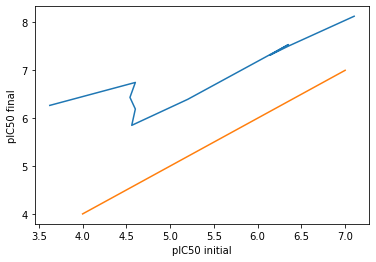

In [73]:
import matplotlib.pyplot as plt
x = [4,5,6,7]
y = x
plt.xlabel('pIC50 initial')
plt.ylabel('pIC50 final')
plt.plot(changes['Initial'].iloc[0:10],changes['Modified'].iloc[0:10],x,y)

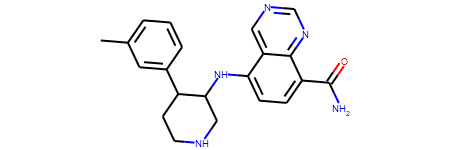

In [47]:
moli[207]

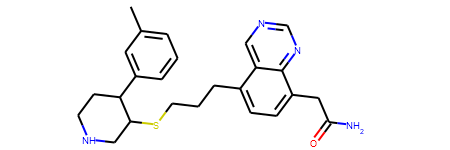

In [48]:
molm[207]

In [9]:
df = pd.read_csv('./Data/AKT_pchembl.csv')
mol = []
i = 1
for smile in df['Smiles']:
    if i>=6:
        break
    mol.append(ch.MolFromSmiles(smile))
    i += 1

In [70]:
changes.loc[changes['Delta']<0].sum()

Modified    1046.061382
Initial     1110.572553
Delta        -64.511171
dtype: float64

In [72]:
changes.loc[changes['Delta']>0].sum()

Modified    1007.102905
Initial      945.802042
Delta         61.300863
dtype: float64

<h2>Exponential run

In [2]:
history = np.load('./history/history.npy')

In [3]:
history.shape

(300, 4)

In [14]:
np.argmax(history[:,2])

292

In [15]:
history[292,2]

0.03769776343136395

In [16]:
np.argmax(history[:,0])

93

In [17]:
history[93,0]

0.9566145350783835

In [22]:
import rewards
import pandas as pd
import rdkit.Chem as ch
df = pd.read_csv('./out292.csv',engine="python")

In [23]:
df.head()

,Initial molecule,Modified molecule
0,O=c1[nH]c2ncc(-c3ccc4[nH]ccc4c3)nc2n1CC1CCOCC1,c1cc2cc(-c3nc(CC4CCOCC4)c4cc[nH]c4n3)ccc2[nH]1
1,CC(=O)Nc1cc(Nc2cnn3c(C#N)cc(NC4CC4)nc23)cnc1C,CCCNc1nc2cc(C#N)cnc2n1Nc1ncc(C)c(NC(C)=O)n1
2,Nc1ncnc(C2CCN(n3cc(CCN4CCCC4)nc3-c3cc(F)ccc3C(...,Nc1ncnc([C@H]2CCCN(c3ccc(-c4cc(F)ccc4C(F)(F)F...
3,CCC(=O)N1CC[C@@H](Oc2ncnc3c2CN(c2ccc(OC)nc2)CC...,CCC(=O)N1CC[C@@H](ONC(=O)CNC(=O)c2ccc(O[11CH3...
4,CCc1nc2ccccc2n1-c1nc(N2CCOCC2)c2sc(CN3CCC(C(C)...,CCc1nc2ccccc2n1-c1nc(N2CCOCC2)c2sc(CN3CCC([C@...


In [24]:
from rewards import bunch_evaluation
moli = []
molm = []
for i in range(len(df)):
    moli.append(ch.MolFromSmiles(df.iloc[i,0]))
    molm.append(ch.MolFromSmiles(df.iloc[i,1]))

In [25]:
ini = bunch_evaluation(moli)
mod = bunch_evaluation(molm)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking 

Properties predicted for 335 molecules
 Evaluations completed
Properties predicted for 331 molecules
 Evaluations completed


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [27]:
ini = np.asarray(ini)
mod = np.asarray(mod)

In [28]:
#remember to change pIC50 conversion depending on the reward function

In [29]:
import math
changes = pd.DataFrame(data=np.transpose(np.asarray([np.log(mod[:,1]*(math.exp(3))),np.log(ini[:,1]*math.exp(3))])),columns=['Modified','Initial']) 

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [31]:
changes['Modified'] += 7
changes['Initial'] += 7

In [32]:
changes.head()

,Modified,Initial
0,6.957853,7.035200
1,6.680960,7.044200
2,6.895700,6.668800
3,7.060047,7.365533
4,7.433233,6.836400


In [33]:
changes['Delta'] = changes['Modified'] - changes['Initial']
changes.sort_values(by='Delta',ascending=False,inplace=True)

In [34]:
inact_to_act = changes.loc[(changes['Modified']>7) & (changes['Initial']<7),['Modified','Initial','Delta']].sort_values(by='Delta',ascending=False)

In [35]:
changes.head(10)

,Modified,Initial,Delta
180,7.878060,4.688333,3.189727
181,7.005000,4.073139,2.931861
155,7.629711,4.877200,2.752511
211,8.120000,5.683067,2.436933
192,7.639956,5.213124,2.426832
206,7.236156,4.856667,2.379489
116,7.997667,5.862542,2.135125
257,6.629733,4.602422,2.027311
326,6.511563,4.586430,1.925134
258,6.865239,5.117533,1.747706


In [36]:
changes.to_csv('./out292_pIC.csv',index=False)

In [37]:
inact_to_act.to_csv('./act_pIC292.csv',index=False)

In [38]:
inact_to_act.head()

,Modified,Initial,Delta
180,7.878060,4.688333,3.189727
181,7.005000,4.073139,2.931861
155,7.629711,4.877200,2.752511
211,8.120000,5.683067,2.436933
192,7.639956,5.213124,2.426832


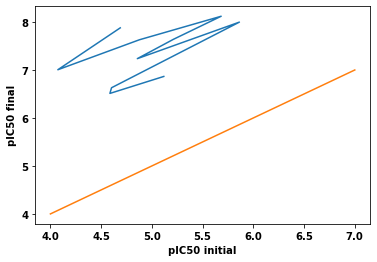

In [39]:
import matplotlib.pyplot as plt
x = [4,5,6,7]
y = x
plt.xlabel('pIC50 initial')
plt.ylabel('pIC50 final')
plt.plot(changes['Initial'].iloc[0:10],changes['Modified'].iloc[0:10],x,y)

In [44]:
new = changes.sort_values(by='Delta',ascending=True,inplace=False)

In [45]:
new.head()

,Modified,Initial,Delta
147,-inf,6.224330,-inf
30,-inf,6.982029,-inf
92,-inf,6.373467,-inf
283,-inf,7.640133,-inf
327,5.234567,7.675933,-2.441367


In [42]:
changes.loc[changes['Delta']<0].count()

Modified    169
Initial     169
Delta       169
dtype: int64

In [43]:
changes.loc[changes['Delta']>0].count()

Modified    162
Initial     162
Delta       162
dtype: int64

<h3>final epoch results

In [5]:
import rewards
import pandas as pd
import rdkit.Chem as ch
df = pd.read_csv('./past outputs/out299.csv',engine="python")
df.head()

,Initial molecule,Modified molecule
0,NC(=O)c1ccc(N2CCN(c3cccc(C(F)(F)F)c3)CC2)c2cnc...,NC(=O)c1ccc(N2CCN(c3cccc(CC(F)(F)F)c3)CC2)c2c...
1,CCc1c(N)ncnc1N1CCC(c2nc(-c3cc(F)ccc3C)cn2CC2CN...,CCn1nc(N)nc1N1CCCC(c2cc(-c3nc(F)cn3CC(=O)O)cc...
2,CC(=O)Nc1nc(C)c(-c2cnc(Sc3cccnc3)o2)s1,CC(=O)Nc1nc(C)c(-c2ccc(Sc3cccnn3)o2)s1
3,O=C(Cc1cc(=O)[nH]c(N2CCOCC2)n1)Nc1cccc(C(F)(F)...,O=C(Cc1cc(=O)[nH]c(N2CCOCC2)n1)Nc1ccnc(OC(F)(...
4,Nc1ncccc1-c1nc2ccc(-c3ccccc3)nc2n1-c1ccc(CNC(=...,Nc1ncccc1-c1nc2ccc(-c3cncnc3)nc2n1-c1ccc(CNC(...


In [6]:
moli = []
molm = []
for i in range(len(df)):
    moli.append(ch.MolFromSmiles(df.iloc[i,0]))
    molm.append(ch.MolFromSmiles(df.iloc[i,1]))
ini = bunch_evaluation(moli)
mod = bunch_evaluation(molm)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking 

Properties predicted for 322 molecules
 Evaluations completed
Properties predicted for 322 molecules
 Evaluations completed


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [9]:
import math
ini = np.asarray(ini)
new_ini = np.log(ini[:,1]*math.exp(3)) + 7

In [11]:
mod = np.asarray(mod)
new_mod = np.log(mod[:,1]*math.exp(3)) + 7

In [28]:
#remember to change pIC50 conversion depending on the reward function

In [12]:
import math
changes = pd.DataFrame(data=np.transpose(np.asarray([new_mod,new_ini])),columns=['Modified','Initial']) 

In [31]:
c

In [13]:
changes.head()

,Modified,Initial
0,6.258733,5.943600
1,6.744733,7.997644
2,7.188200,7.172533
3,6.185809,5.653519
4,5.663200,6.124267


In [14]:
changes['Delta'] = changes['Modified'] - changes['Initial']
changes.sort_values(by='Delta',ascending=False,inplace=True)

In [15]:
inact_to_act = changes.loc[(changes['Modified']>7) & (changes['Initial']<7),['Modified','Initial','Delta']].sort_values(by='Delta',ascending=False)

In [16]:
changes.head(10)

,Modified,Initial,Delta
142,6.985400,5.240617,1.744783
305,6.258959,4.540926,1.718033
127,6.978289,5.410350,1.567939
104,6.247933,4.688333,1.559600
176,8.206911,6.683533,1.523378
45,7.009950,5.515672,1.494278
96,7.184411,5.743600,1.440811
84,6.601525,5.201288,1.400236
122,6.154267,4.767467,1.386800
111,7.019522,5.741271,1.278251


In [17]:
changes.to_csv('./out299_pIC.csv',index=False)

In [18]:
inact_to_act.to_csv('./act_pIC299.csv',index=False)

In [19]:
inact_to_act.head()

,Modified,Initial,Delta
176,8.206911,6.683533,1.523378
45,7.009950,5.515672,1.494278
96,7.184411,5.743600,1.440811
111,7.019522,5.741271,1.278251
315,7.046802,5.854000,1.192802


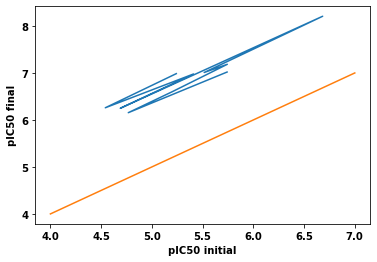

In [20]:
import matplotlib.pyplot as plt
x = [4,5,6,7]
y = x
plt.xlabel('pIC50 initial')
plt.ylabel('pIC50 final')
plt.plot(changes['Initial'].iloc[0:10],changes['Modified'].iloc[0:10],x,y)

(array([ 3., 14., 16., 44., 90., 80., 41., 17., 10.,  7.]),
 array([-1.68285238, -1.34008887, -0.99732537, -0.65456186, -0.31179835,
         0.03096516,  0.37372867,  0.71649217,  1.05925568,  1.40201919,
         1.7447827 ]),
 <a list of 10 Patch objects>)

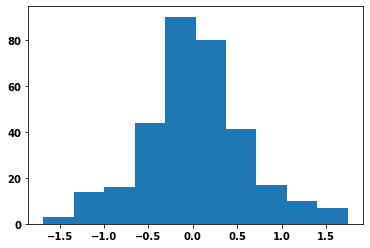

In [22]:
plt.hist(changes['Delta'])

In [23]:
changes.loc[changes['Delta']<0].count()

Modified    154
Initial     154
Delta       154
dtype: int64

In [24]:
changes.loc[changes['Delta']>0].count()

Modified    165
Initial     165
Delta       165
dtype: int64

<h1>pIC>8

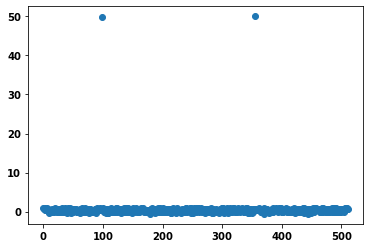

In [13]:
r_tot = np.load('r_tot.npy')
plt.scatter(range(len(r_tot)),r_tot)

In [14]:
r_tot2 = []
for val in r_tot:
    if val<10:
        r_tot2.append(val)
r_tot2 = np.asarray(r_tot2)

0.32990919076719977


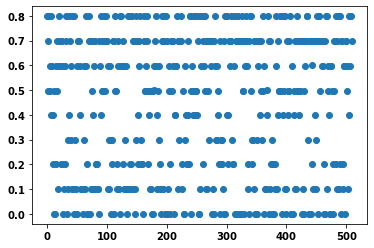

In [20]:
plt.scatter(range(len(r_tot2)),abs(r_tot2))
print(r_tot2.mean())

In [23]:
df = pd.read_csv('./past outputs/out159.csv',engine="python")
from rewards import bunch_evaluation
moli = []
molm = []
for i in range(len(df)):
    moli.append(ch.MolFromSmiles(df.iloc[i,0]))
    molm.append(ch.MolFromSmiles(df.iloc[i,1]))

In [35]:
ini = get_pIC50(moli)
ini = np.asarray(ini)
mod = get_pIC50(molm)
mod = np.asarray(mod)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking 

Properties predicted for 332 molecules
Properties predicted for 332 molecules


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [37]:
mod

array([7.21311667, 7.28747619, 7.26781667, 5.61117706, 6.44118667,
       6.4624    , 6.7806    , 8.18751111, 6.7731    , 6.37364   ,
       6.85693333, 7.02673333, 7.10459667, 5.37521066, 7.88184444,
       6.22273333, 7.03382667, 6.88911111, 6.42145556, 6.95593333,
       5.75816111, 6.33978333, 6.4948    , 7.36733333, 6.83312222,
       7.44026667, 6.98306667, 6.60344667, 6.65702606, 6.58716   ,
       6.57853333, 7.8907    , 6.97338333, 7.2508    , 6.89677778,
       7.02671778, 7.01973333, 6.07490348, 7.09186667, 7.34121905,
       6.94091111, 5.46482222, 6.76495   , 7.8907    , 6.83978889,
       6.96785556, 7.29617619, 6.47956667, 6.78123333, 7.03639556,
       7.18218333, 7.49346111, 6.81013333, 6.82448222, 7.39304444,
       6.22495   , 7.32882222, 6.15245   , 6.84138889, 7.76048667,
       7.02518333, 7.2459    , 7.05921333, 7.19753333, 6.11520333,
       5.86386495, 7.69666667, 7.21892778, 6.75582222, 7.44068889,
       7.09936667, 6.26666667, 7.82994444, 7.17473333, 6.48731

In [38]:
changes = pd.DataFrame(data=np.transpose(np.asarray([mod,ini])),columns=['Modified','Initial']) 

In [31]:
c

In [39]:
changes.head()

,Modified,Initial
0,7.213117,7.763167
1,7.287476,6.806319
2,7.267817,7.062500
3,5.611177,6.808733
4,6.441187,6.868733


In [40]:
changes['Delta'] = changes['Modified'] - changes['Initial']
changes.sort_values(by='Delta',ascending=False,inplace=True)

In [41]:
inact_to_act = changes.loc[(changes['Modified']>7) & (changes['Initial']<7),['Modified','Initial','Delta']].sort_values(by='Delta',ascending=False)

In [42]:
changes.head(10)

,Modified,Initial,Delta
68,6.755822,4.659000,2.096822
64,6.115203,4.556286,1.558917
90,7.376933,5.935533,1.441400
145,7.512700,6.191400,1.321300
181,7.557433,6.240200,1.317233
324,6.469833,5.201288,1.268545
6,6.780600,5.518533,1.262067
266,7.020967,5.822504,1.198462
239,7.541647,6.350311,1.191336
315,7.336733,6.216413,1.120320


In [44]:
changes.to_csv('./out159_pIC.csv',index=False)

In [43]:
inact_to_act.to_csv('./act_pIC159.csv',index=False)

In [45]:
inact_to_act.head()

,Modified,Initial,Delta
90,7.376933,5.935533,1.441400
145,7.512700,6.191400,1.321300
181,7.557433,6.240200,1.317233
266,7.020967,5.822504,1.198462
239,7.541647,6.350311,1.191336


In [46]:
changes.loc[changes['Delta']<0].sum()

Modified    1003.809442
Initial     1062.834505
Delta        -59.025062
dtype: float64

In [47]:
changes.loc[changes['Delta']>0].sum()

Modified    1224.952920
Initial     1147.710643
Delta         77.242277
dtype: float64

In [48]:
changes['Delta'].sum()

18.217214788101835

In [49]:
img = (ch.MolFromSmiles(df.iloc[1,0]))
mol2 = ch.MolFromSmiles(df.iloc[1,1])

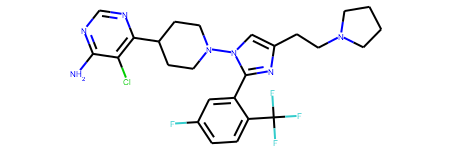

In [50]:
img

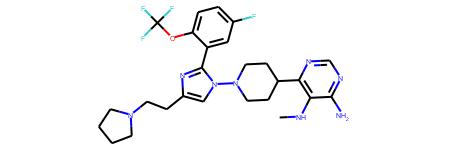

In [51]:
mol2

In [54]:
losses = np.load("./Losses/Loss in epoch 159.npy")

In [58]:
loss = []
for i in range(160):
    losses = np.load("./Losses/Loss in epoch {}.npy".format(i))
    loss.append(losses)
loss = np.asarray(loss)

array([[ 4.14573795e+00],
       [ 3.23710475e+00],
       [-5.56290116e-02],
       [-5.28769038e-01],
       [ 3.33294003e+00],
       [-2.33459896e-01],
       [ 3.27002327e+00],
       [ 3.68573103e+00],
       [-2.47477769e-01],
       [-2.08487980e-01],
       [ 3.18746516e+00],
       [ 3.06717533e+00],
       [ 2.84641548e+00],
       [ 3.15158390e+00],
       [ 3.06425804e+00],
       [ 2.81926926e+00],
       [ 3.00993953e+00],
       [ 3.11982700e+00],
       [-7.22013649e-01],
       [-3.17054212e-01],
       [-9.01264858e-01],
       [ 2.75065436e+00],
       [ 3.02553637e+00],
       [-3.30761087e-01],
       [ 2.63856528e+00],
       [ 3.32289219e+00],
       [-5.56590544e-01],
       [ 2.64847527e+00],
       [ 2.98366455e+00],
       [-1.56220060e-01],
       [ 3.00603351e+00],
       [-3.90810557e-01],
       [ 2.89239766e+00],
       [ 3.01290753e+00],
       [ 3.26072344e+00],
       [-2.14935413e-01],
       [ 2.48285812e+00],
       [-4.60470286e-01],
       [ 2.8

<h1>29-06-20

In [4]:
history = np.load('./history/history.npy')

In [12]:
ind = []
for i in range(len(history)):
    if history[i,2] > 0.015:
        ind.append(i)

In [13]:
ind

[28, 70, 85, 203, 210, 227, 229, 244, 250, 262, 280, 284, 292, 295]

<h2> Epoch 85 results

In [22]:
df = pd.read_csv('./past outputs/out85.csv',engine="python")
df.head()

,Initial molecule,Modified molecule
0,COc1ccc(N2CCc3ncnc(-c4cccc(OC5CCN(C(C)=O)CC5)c...,CSc1ccc(N[C@H](C)c2cccc(OC3=CCN(C(C)=O)CC3)c2...
1,NC(=O)c1c(N)ncnc1N1CCC(c2nc(-c3cc(F)ccc3Cl)cn2...,CCCSc1ccc([18F])cc1-c1cn(CCN2CCCC2)c(C2CCN(c3...
2,NC1([C@@H](CCc2ccc(Cl)cc2)NC(=O)N2CCCCC2)CCN(c...,N[N+]1(N(CCCc2ccc(Cl)cc2)C(=O)N2CCCCC2)CCN(c2...
3,Cc1nc(N)nc(-n2c(Nc3cn[nH]c3)nc3ccccc32)n1,Cc1nc(N)nc(-n2c(Nc3c[nH]cc3)nc3ccccc32)n1
4,Nc1ccc(S(=O)(=O)Nc2nncs2)cc1,Nc1ncc(S(=O)(=O)Nc2nccs2)cn1


In [23]:
from rdkit import Chem as ch
moli = []
molm = []
for i in range(len(df)):
    moli.append(ch.MolFromSmiles(df.iloc[i,0]))
    molm.append(ch.MolFromSmiles(df.iloc[i,1]))

In [28]:
ini = get_pIC50(moli)

Properties predicted for 319 molecules


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
del molm[140]

In [46]:
print(len(molm))
mod = get_pIC50(molm)

318
Properties predicted for 318 molecules


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [41]:
ini = np.delete(ini,140)
len(ini)

318

In [45]:
mod.shape

(318, 2)

In [47]:
ini = np.asarray(ini)
mod = np.asarray(mod)
changes = pd.DataFrame(np.transpose(np.asarray([ini,mod])),columns=['Modified','Initial'])
changes['Delta'] = changes['Modified'] - changes['Initial']
changes.sort_values(by='Delta',ascending=False,inplace=True)
changes.head()

,Modified,Initial,Delta
189,8.336200,6.478356,1.857844
247,8.098800,6.523031,1.575769
245,8.025467,6.550161,1.475306
0,7.633944,6.165019,1.468925
296,6.001322,4.814178,1.187144


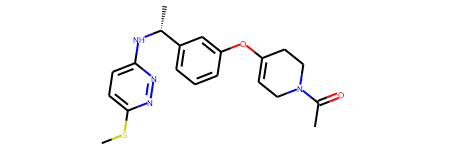

In [21]:
molm[0]

In [50]:
inact_to_act = changes.loc[(changes['Modified']>7) & (changes['Initial']<7),['Modified','Initial','Delta']].sort_values(by='Delta',ascending=False)
changes.to_csv('./past outputs/out85_pIC.csv',index=False)
inact_to_act.to_csv('./past outputs/act_pIC85.csv',index=False)

In [51]:
changes.head(10)

,Modified,Initial,Delta
189,8.336200,6.478356,1.857844
247,8.098800,6.523031,1.575769
245,8.025467,6.550161,1.475306
0,7.633944,6.165019,1.468925
296,6.001322,4.814178,1.187144
203,7.584806,6.447150,1.137656
310,7.717867,6.588387,1.129480
180,7.984889,6.868149,1.116740
308,7.902000,6.801856,1.100144
39,8.090167,7.021489,1.068678


In [52]:
inact_to_act.head()

,Modified,Initial,Delta
189,8.336200,6.478356,1.857844
247,8.098800,6.523031,1.575769
245,8.025467,6.550161,1.475306
0,7.633944,6.165019,1.468925
203,7.584806,6.447150,1.137656


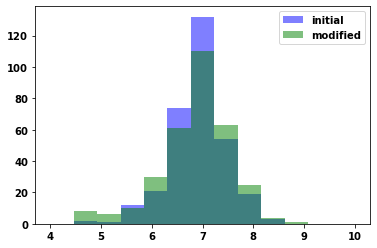

In [108]:
import matplotlib.pyplot as plt
changes = pd.read_csv('./past outputs/out85_pIC.csv')
inact_to_act=pd.read_csv('./past outputs/act_pIC85.csv')
bins = np.linspace(4,10,14)
#changes = changes.loc[changes.Delta>0]
plt.hist(changes['Initial'], bins, alpha=0.5, label='initial',color='blue')
plt.hist(changes['Modified'], bins, alpha=0.5, label='modified',color='green')
plt.legend(loc='upper right')

In [58]:
changes.loc[changes['Delta']<0].sum()['Delta']

-68.04726634855014

In [57]:
changes.loc[changes['Delta']>0].sum()

Modified    1095.52368
Initial     1040.30229
Delta         55.22139
dtype: float64

In [64]:
for i in range(len(df)):
        if type(Chem.MolFromSmiles(df.iloc[i,1])) != "<class 'NoneType'>":
            if i==140:
                print(type(Chem.MolFromSmiles(df.iloc[i,1])))
            moli.append(Chem.MolFromSmiles(df.iloc[i,0]))
            molm.append(Chem.MolFromSmiles(df.iloc[i,1]))

<class 'NoneType'>


In [62]:
type(molm[140])

NoneType

<h2>Epoch 295

In [65]:
df = pd.read_csv('./past outputs/out295.csv',engine="python")
df.head()

,Initial molecule,Modified molecule
0,Nc1ncccc1-c1nc2cc(Br)cnc2n1-c1ccc(CNC(=O)c2ccc...,Nc1ncccc1-c1nc2cc(OCCCOCCF)cnc2n1-c1ccc(CNC(=...
1,C[C@@H](Nc1c(N)ncnc1C#N)c1nn2ccnc2c(=O)n1-c1cc...,CC(C(=O)c1c(C#N)ncnc1I)c1nn2ccnc2c(=O)n1-c1cc...
2,C[C@@H](Nc1ncnc2[nH]cnc12)c1nn2cccc2c(=O)n1-c1...,C[C@@H](Nc1ncnc2c1nc[nH]2)c1cnc2[nH]c(=O)n(-n...
3,C=C(C)c1c(N)ncnc1N1CCC(c2nc(-c3cc(F)ccc3C(F)(F...,C=C(C)n1nc(N)nc1N1CCCC(c2nc(-c3cc([18F])ccc3O...
4,CC1Cc2ccccc2N1C(=O)Cc1nc(N2CCOCC2)cc(=O)n1C,Cc1c(N2CCOCC2)nc(CC(=O)c2ccc3CCCC(C)c3c2)[nH]...


In [79]:
from rdkit import Chem as ch
moli = []
molm = []
for i in range(len(df)):
        if (Chem.MolFromSmiles(df.iloc[i,1])) is not None:
            moli.append(Chem.MolFromSmiles(df.iloc[i,0]))
            molm.append(Chem.MolFromSmiles(df.iloc[i,1]))
print(len(molm))

317


In [68]:
ini = get_pIC50(moli)

Properties predicted for 317 molecules


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [87]:
for i in range(len(molm)):
    if molm[i] is None:
        print(i)

127


In [46]:
print(len(molm))
mod = get_pIC50(molm)

318
Properties predicted for 318 molecules


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.20.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [41]:
ini = np.delete(ini,140)
len(ini)

318

In [45]:
mod.shape

(318, 2)

In [47]:
ini = np.asarray(ini)
mod = np.asarray(mod)
changes = pd.DataFrame(np.transpose(np.asarray([ini,mod])),columns=['Modified','Initial'])
changes['Delta'] = changes['Modified'] - changes['Initial']
changes.sort_values(by='Delta',ascending=False,inplace=True)
changes.head()

,Modified,Initial,Delta
189,8.336200,6.478356,1.857844
247,8.098800,6.523031,1.575769
245,8.025467,6.550161,1.475306
0,7.633944,6.165019,1.468925
296,6.001322,4.814178,1.187144


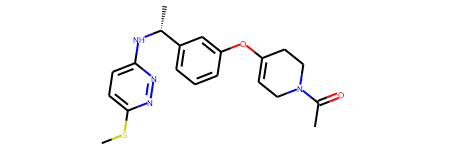

In [21]:
molm[0]

In [92]:
#inact_to_act = changes.loc[(changes['Modified']>7) & (changes['Initial']<7),['Modified','Initial','Delta']].sort_values(by='Delta',ascending=False)
changes = pd.read_csv('./past outputs/out_pIC295.csv')
inact_to_act= pd.read_csv('./past outputs/act_pIC295.csv')

In [93]:
changes.head(10)

,Modified,Initial,Delta
0,6.771067,5.138931,1.632136
1,7.248672,5.837932,1.410740
2,7.358767,6.045486,1.313281
3,7.868600,6.607863,1.260737
4,6.704933,5.495667,1.209267
5,7.853556,6.749356,1.104200
6,8.192291,7.227511,0.964780
7,7.719600,6.776863,0.942737
8,7.964067,7.111183,0.852883
9,7.719600,6.878530,0.841070


In [94]:
inact_to_act.head()

,Modified,Initial,Delta
0,7.248672,5.837932,1.410740
1,7.358767,6.045486,1.313281
2,7.868600,6.607863,1.260737
3,7.853556,6.749356,1.104200
4,7.719600,6.776863,0.942737


In [9]:
changes = pd.read_csv('./past outputs/29Jun/out_pIC295.csv')
inact_to_act=pd.read_csv('./past outputs/29Jun/act_pIC295.csv')

In [19]:
[changes.loc[changes['Initial']>8]['Initial'].count(),changes.loc[changes['Modified']>8]['Modified'].count()]

[10, 8]

<BarContainer object of 2 artists>

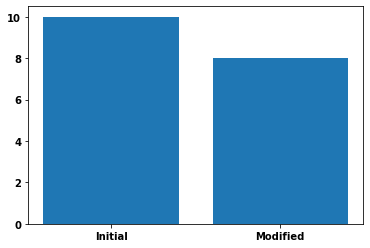

In [21]:
plt.bar(["Initial","Modified"],[changes.loc[changes['Initial']>8]['Initial'].count(),changes.loc[changes['Modified']>8]['Modified'].count()])

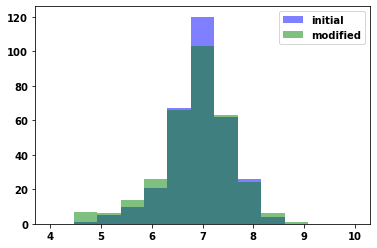

In [110]:
import matplotlib.pyplot as plt
bins = np.linspace(4,10,14)
#changes = changes.loc[changes.Delta>0]
plt.hist(changes['Initial'], bins, alpha=0.5, label='initial',color='blue')
plt.hist(changes['Modified'], bins, alpha=0.5, label='modified',color='green')
plt.legend(loc='upper right')

In [58]:
changes.loc[changes['Delta']<0].sum()['Delta']

-68.04726634855014

<h1>r_tot what is?

In [3]:
import numpy as np
hist = np.load('./History/history.npy')


In [4]:
hist.shape

(300, 4)

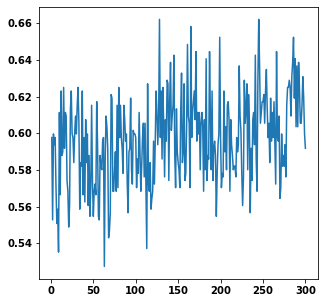

In [14]:
plt.figure(figsize=(5,5))
plt.plot(range(1,301),hist[:,1])

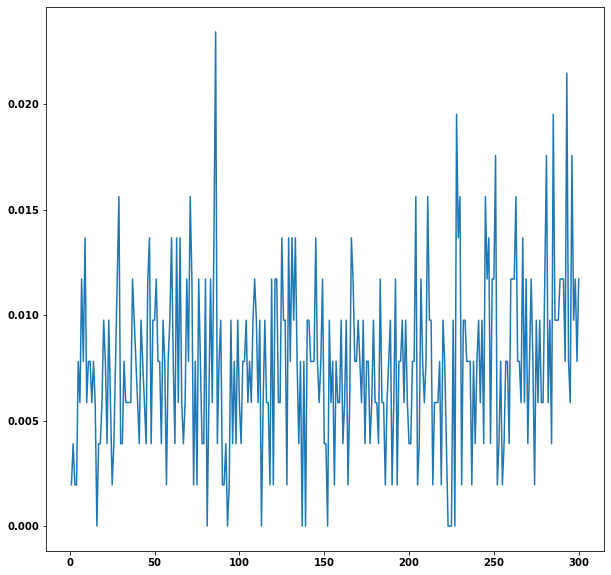

In [16]:
plt.figure(figsize=(10,10))
plt.plot(range(1,301),hist[:,2])

In [18]:
df = pd.DataFrame(data=hist,columns=["mean_r_tot","valid_frac","good_pIC","mean_score"])

In [21]:
df.mean_score.unique()

array([0.00195312, 0.00390625, 0.0078125 , 0.00585938, 0.01171875,
       0.01367188, 0.        , 0.00976562, 0.015625  , 0.0234375 ,
       0.01953125, 0.01757812, 0.02148438])

In [25]:
len(df.good_pIC.unique())

13

In [24]:
len(df.valid_frac.unique())

59

Note that fraction all valid = fraction pIC > 8

<h1> Estimating number of NaN values

In [39]:
import sys
sys.path.insert(0,'./Modules/')
from rewards import get_padel
get_padel(r'C:\Users\HP\AZC_Internship\DeepFMPO\3.6\generated_molecules','./chk_desc.csv','1500')

In [40]:
df = pd.read_csv('./chk_desc.csv')

In [41]:
unavlb = []
for col in df.columns:
    if df[col].isna().any() == True:
        print(df[col].isna().describe())
        unavlb.append(col)

count      308
unique       2
top       True
freq       292
Name: SCH-3, dtype: object
count      308
unique       2
top       True
freq       292
Name: SCH-4, dtype: object
count      308
unique       2
top       True
freq       292
Name: SCH-5, dtype: object
count      308
unique       2
top       True
freq       292
Name: SCH-6, dtype: object
count      308
unique       2
top       True
freq       292
Name: SCH-7, dtype: object
count      308
unique       2
top       True
freq       292
Name: VCH-3, dtype: object
count      308
unique       2
top       True
freq       292
Name: VCH-4, dtype: object
count      308
unique       2
top       True
freq       292
Name: VCH-5, dtype: object
count      308
unique       2
top       True
freq       292
Name: VCH-6, dtype: object
count      308
unique       2
top       True
freq       292
Name: VCH-7, dtype: object
count      308
unique       2
top       True
freq       282
Name: SP-0, dtype: object
count      308
unique       2
top       True

Till 1500ms:These columns are not there in RFECVSKB1200 => <b>Null values are not affecting the model</b>

In [42]:
chk = True
for col in unavlb:
    if col in needed_cols:
        print("Losing")
        chk = False
        break
if chk:
    print("No problem (y)")

No problem (y)


In [11]:
x = pd.read_csv(r'C:\Users\HP\AZC_Internship\jupyter notebooks\data\RFECV1200SKB2.csv')
needed_cols = x.columns

In [15]:
df.head(10)

,Name,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,...,nT5HeteroRing,nT6HeteroRing,nT7HeteroRing,nT8HeteroRing,nT9HeteroRing,nT10HeteroRing,nT11HeteroRing,nT12HeteroRing,nTG12HeteroRing,LipinskiFailures
0,10,5039.970682,5223.716046,7606.656293,8417.172469,7930.540778,6869.434662,6138.930561,6116.460679,5335.137068,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,100,4669.708630,5440.989382,7705.605475,7909.481514,6984.642688,6491.314192,6227.101198,5463.471354,5027.893249,...,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2,101,5580.133114,6190.047729,8915.936064,9392.375746,9975.203626,10536.031895,10390.103630,10306.291221,9389.331234,...,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0
3,0,5818.100451,6593.733096,10266.792096,11364.878541,12421.098234,11710.054145,9562.036369,7797.198820,7109.291543,...,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,102,7204.771591,7100.449277,10699.590348,10185.879728,9029.673054,8758.728401,7407.515599,7574.000067,7440.759138,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
5,103,7508.069932,7662.711000,11926.694560,12476.783944,12529.247385,13347.782414,13900.206316,13237.983828,13015.111445,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,104,5942.265309,7019.459355,10586.189627,11121.408672,10879.828865,10195.015397,9706.897819,9190.852239,7887.291748,...,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
7,1,5988.112600,6333.725099,9274.302811,10008.147995,10364.297685,10894.198085,11465.456663,10240.976339,8960.532826,...,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
8,106,22008.451686,8187.937738,11907.702438,14139.147568,14477.188409,12646.665216,13822.895763,15478.710913,15607.285126,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,105,7670.218382,7877.314820,12000.669514,12240.582534,13885.610632,13257.443903,13118.960688,12730.064125,13902.085509,...,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [53]:
r=  np.load('rewards.npy')

In [54]:
r.shape

(512, 1)

In [55]:
df.isna().describe()

,Name,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,...,nT5HeteroRing,nT6HeteroRing,nT7HeteroRing,nT8HeteroRing,nT9HeteroRing,nT10HeteroRing,nT11HeteroRing,nT12HeteroRing,nTG12HeteroRing,LipinskiFailures
count,308,308,308,308,308,308,308,308,308,308,...,308,308,308,308,308,308,308,308,308,308
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,308,308,308,308,308,308,308,308,308,308,...,308,308,308,308,308,308,308,308,308,308


In [56]:
r

array([[ 0.        ],
       [ 0.85969206],
       [ 0.        ],
       [ 0.85969206],
       [ 0.        ],
       [ 0.85969206],
       [ 0.85969206],
       [-0.1       ],
       [ 0.75969206],
       [ 0.        ],
       [ 0.85969206],
       [ 0.75969206],
       [ 0.85969206],
       [-0.1       ],
       [ 0.85969206],
       [ 0.        ],
       [ 0.85969206],
       [ 0.        ],
       [ 0.        ],
       [ 0.85969206],
       [ 0.85969206],
       [ 0.75969206],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.85969206],
       [ 0.75969206],
       [ 0.        ],
       [ 0.85969206],
       [ 0.        ],
       [ 0.85969206],
       [ 0.85969206],
       [ 0.        ],
       [ 0.85969206],
       [ 0.75969206],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.85969206],
       [ 0.85969206],
       [ 0.        ],
       [ 0.        ],
       [ 0.85969206],
       [ 0

In [3]:
df = pd.read_csv('./past outputs/out'+str(249)+'.csv',sep=";")

In [4]:
df.head()

,Initial molecule,Modified molecule
0,CC(=O)Nc1cc(Nc2cnn3c(C#N)cc(NC4CC4)nc23)cnc1C,CCCCNc1nc2c(Nc3cnc(C)c(C(=O)OC)c3)cnn2c(C#N)c1
1,O=C(Cc1cc(=O)[nH]c(N2CCOCC2)n1)N1CCc2ccc(F)cc21,O=C(Cc1cc(=O)[nH]c(C2CCCC2)n1)N1CCc2ccc(F)cc21
2,NC1(c2ccc(-c3ncc4cccnc4c3-c3ccccc3)cc2)CCC1,O=C(O)C1(c2ccc(-c3ncc4cccnc4c3-c3ccccc3)cc2)CCC1
3,O=C(Cc1cc(=O)[nH]c(-c2ccncc2)n1)N1CCc2c(F)cccc21,O=C(Cc1cc(=O)[nH]c(-c2ncnc2)n1)N1CCc2c(F)cccc21
4,Nc1cc(N2CCC(c3nc(-c4cc(F)ccc4C(F)(F)F)cn3CCN3C...,Nc1cc(N2CCC(c3cc(-c4cc([18F])ccc4C(F)(F)F)ccc...


In [6]:
moli = []
molm = []

for i in range(len(df)):
    if (Chem.MolFromSmiles(df.iloc[i,1])) is not None:
        moli.append(Chem.MolFromSmiles(df.iloc[i,0]))
        molm.append(Chem.MolFromSmiles(df.iloc[i,1]))

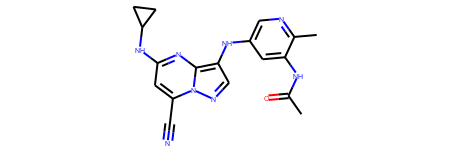

In [7]:
moli[0]

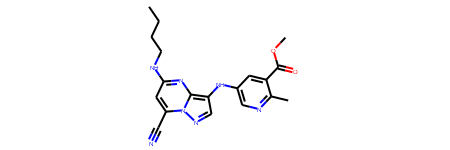

In [9]:
molm[0]

In [10]:
def get_pIC50(mols):
    folder_path =  "./generated_molecules/"
    file_path = "./descriptors.csv"
    #Cleaning up the older files
    clean_folder(folder_path)
    
    i = 0
    for mol in mols:
        print(Chem.MolToMolBlock(mol),file=open(str(folder_path)+str(i)+'.mol','w'))
        i += 1
    get_padel(folder_path,file_path)
      #Reading the descriptors
    xg_all = pd.read_csv(file_path)

    names = xg_all['Name']

    bad = []
    with open('./saved_models/good_columns','rb') as f:
        cols = pickle.load(f)
    for col in xg_all.columns:
        if col not in cols:
            bad.append(col)
    xg_all.drop(columns=bad,inplace=True)
    #Verifying that all the required columns are there
    assert len(xg_all.columns) == len(cols)
    xg_all['Name'] = names

    files = xg_all[pd.isnull(xg_all).any(axis=1)]['Name']
    xg_all.dropna(inplace=True)
    mol= []
    if len(files) !=0:
        uneval_folder = "C:\\Users\\HP\\AZC_Internship\\DeepFMPO\\3.6\\unevalmol\\"
        clean_folder(uneval_folder)
        for f in files:
            m = Chem.MolFromMolFile(folder_path+str(f)+'.mol')
            print(Chem.MolToMolBlock((m)),file=open(str(uneval_folder)+str(f)+'.mol','w'))

        get_padel(uneval_folder,'./uneval_desc.csv','-1')
        unevalmol = pd.read_csv('./uneval_desc.csv')

        unevalmol.drop(columns=bad,inplace=True)
        print(unevalmol.isna().sum(axis=1))
        xg_all = pd.concat([xg_all,unevalmol])
    xg_all.to_csv('./xgall.csv')
    xg_all.fillna(value=0,inplace=True)
    regressor = xgb.XGBRegressor()
    regressor.load_model('./saved_models/best_from_gs38.model')

    xg_all.sort_values(by='Name',inplace=True)
    xg_all.drop(columns='Name',inplace=True)
    predictions = regressor.predict(xg_all)
    
    print('Properties predicted for {} molecules'.format(len(predictions)))
    return predictions


In [5]:
df = pd.read_csv(r'C:\Users\HP\AZC_Internship\DeepFMPO\3.6\past outputs\out1250.csv',sep=';')

In [8]:
moli = []
molm = []
for i in range(len(df)):
    
    moli.append(Chem.MolFromSmiles(df.iloc[i,0]))
    molm.append(Chem.MolFromSmiles(df.iloc[i,1]))

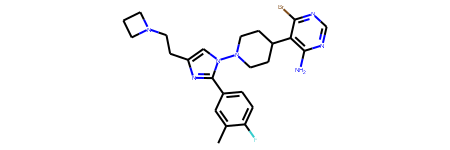

In [9]:
moli[0]

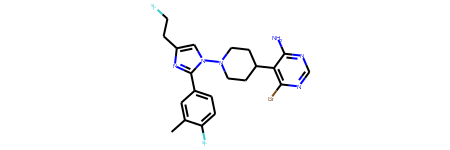

In [10]:
molm[0]

In [5]:
df = pd.read_csv('./Data/AKT_pChemBL.csv')
df = df.loc[df['pChEMBL_Value']<7]
df_new = df.sample(frac=400/len(df))
df_new.to_csv('./Data/AKT_pChemBL_cleaned_good.csv',index=False)

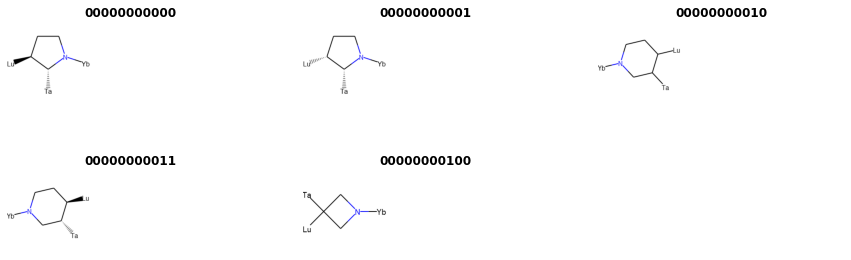

In [16]:
from build_encoding import read_decodings, read_encodings
encodings = read_encodings()
decodings = read_decodings()
import matplotlib.image as mpimg
from rdkit import Chem
from rdkit.Chem import rdBase
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
i = 0
plt.figure(figsize=(15,5))
for code,mol in decodings.items() :
    mols = []
    if i==5:
        break
    mols.append(mol)
    img = Draw.MolsToGridImage(mols)
    plt.subplot(2,3,i+1)
    plt.axis('off')
    plt.title(code)
    i += 1
    #img = mpimg.imread('file-name.png')
    plt.imshow(img)

<h1>An update to view_outputs.py

In [22]:
import sys
sys.path.insert(0,'./Modules/')
import numpy as np
from file_reader import read_file
import pandas as pd
from rdkit import Chem
from mol_utils import get_fragments
import numpy as np
import sys
import matplotlib.pyplot as plt
import pickle
import argparse
import xgboost as xgb
import Show_Epoch
import logging
from keras.utils.generic_utils import get_custom_objects
import keras
sys.path.insert(0,'./Modules/')
from models import maximization
from rewards import get_padel, clean_folder, modify_fragment
from build_encoding import get_encodings, encode_molecule, decode_molecule, encode_list, save_decodings, save_encodings, read_decodings, read_encodings
from global_parameters import MAX_SWAP, MAX_FRAGMENTS, GAMMA, BATCH_SIZE, EPOCHS, TIMES, FEATURES
#similar to bunch_Eval, except that it is without the rewards
def get_pIC50(mols):
    folder_path =  "./generated_molecules/"
    file_path = "./descriptors.csv"
    #Cleaning up the older files
    clean_folder(folder_path)
    
    i = 0
    for mol in mols:
        print(Chem.MolToMolBlock(mol),file=open(str(folder_path)+str(i)+'.mol','w'))
        i += 1
    get_padel(folder_path,file_path,'-1')
      #Reading the descriptors
    xg_all = pd.read_csv(file_path)

    names = xg_all['Name']

    bad = []
    with open('./saved_models/good_columns','rb') as f:
        cols = pickle.load(f)
    for col in xg_all.columns:
        if col not in cols:
            bad.append(col)
    xg_all.drop(columns=bad,inplace=True)
    #Verifying that all the required columns are there
    assert len(xg_all.columns) == len(cols)
    xg_all['Name'] = names

    files = xg_all[pd.isnull(xg_all).any(axis=1)]['Name']
    xg_all.dropna(inplace=True)
    mol= []
    if len(files) !=0:
        uneval_folder = "C:\\Users\\HP\\AZC_Internship\\DeepFMPO\\3.6\\unevalmol\\"
        clean_folder(uneval_folder)
        for f in files:
            m = Chem.MolFromMolFile(folder_path+str(f)+'.mol')
            print(Chem.MolToMolBlock((m)),file=open(str(uneval_folder)+str(f)+'.mol','w'))

        get_padel(uneval_folder,'./uneval_desc.csv','-1')
        unevalmol = pd.read_csv('./uneval_desc.csv')

        unevalmol.drop(columns=bad,inplace=True)
        print(unevalmol.isna().sum(axis=1))
        xg_all = pd.concat([xg_all,unevalmol])
    xg_all.to_csv('./xgall.csv')
    xg_all.fillna(value=0,inplace=True)
    regressor = xgb.XGBRegressor()
    regressor.load_model('./saved_models/best_from_gs38.model')

    xg_all.sort_values(by='Name',inplace=True)
    xg_all.drop(columns='Name',inplace=True)
    predictions = regressor.predict(xg_all)
    
    print('Properties predicted for {} molecules'.format(len(predictions)))
    return predictions


df = pd.read_csv(r'C:\Users\HP\AZC_Internship\DeepFMPO\3.6\past outputs\6July\out299.csv',sep=";")
moli = []
molm = []

for i in range(len(df)):
    if (Chem.MolFromSmiles(df.iloc[i,1])) is not None:
        moli.append(Chem.MolFromSmiles(df.iloc[i,0]))
        molm.append(Chem.MolFromSmiles(df.iloc[i,1]))
logging.info("Predicting pIC50 values of the initial molecules")
ini = get_pIC50(moli)
logging.info("Predicting pIC50 values of the predicted molecules")
mod = get_pIC50(molm)
ini = np.asarray(ini)
mod = np.asarray(mod)
    


Properties predicted for 311 molecules
Properties predicted for 311 molecules


In [ ]:
df.iloc[0]

In [31]:
np.asarray([df.iloc[:,0],df.iloc[:,1],np.transpose([ini,mod])])

0             Cn1c(NC(=O)Cc2ccc(F)cc2)nc(N2CCOCC2)cc1=O 
1      CCc1c(N)ncnc1N1CCC(c2nc(-c3cc(F)ccc3F)cn2CCN2C...
2      COc1ccc(Nc2nc3ccc(N4CCNCC4)cn3c2-c2nc(C)nc(N)n...
3      Cn1c(Cc2cc(=O)[nH]c(N3CCOCC3)n2)nc2c(-c3ccccc3...
4      CCN(CCn1cc(-c2cc(F)ccc2C)nc1C1CCN(c2ncnc(N)c2C...
                             ...                        
307    COC(=O)c1ccc(-c2c(N)ncnc2N2CCC(c3nc(-c4cc(F)cc...
308    CC1=NN(C(=O)c2ccc(Cl)cc2)C(=O)C1N=Nc1ccc(S(=O)...
309              CC(=O)Nc1nc(C)c(-c2cnc(-c3cccnc3)o2)s1 
310          Cc1cccc2nc(Cc3nc(N4CCOCC4)cc(=O)[nH]3)oc12 
311    CNC(=O)c1nc(-c2cc(Cl)ccc2NS(=O)(=O)c2ccc(Cl)cc...
Name: Initial molecule , Length: 312, dtype: object

In [33]:
changes =  pd.DataFrame(np.transpose(np.asarray([ini,mod])),columns=['Initial_pIC','Modified_pIC'])
changes['Initial_mol'] = df.iloc[:,0]
changes['Modified_mol'] = df.iloc[:,1]
changes['Delta'] = changes['Modified_pIC'] - changes['Initial_pIC']
changes.sort_values(by='Delta',ascending=False,inplace=True)
changes.head()

,Initial_pIC,Modified_pIC,Initial_mol,Modified_mol,Delta
44,5.318462,6.462502,NC1(C(CCCc2ccc(Cl)cc2)NC(=O)N2CCCCC2)CCN(c2ncn...,CC1(C(Cc2ccc(Cl)cc2)C(=O)N2CCCCC2)CCN(c2ncnc3...,1.144041
57,6.816990,7.839016,CCc1c(N)ncnc1N1CCC(c2nc(-c3cc(F)ccc3F)cn2CCN2C...,CCc1c(N)ncnc1N1CCC(c2cc(-c3cc(F)ccc3OCCOCCF)c...,1.022026
100,5.859008,6.834826,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(-c3cc...,CNc1cc(-c2ccc(-c3cc(CC(F)(F)F)nn3-c3ccc(NS(C)...,0.975818
42,5.318462,6.279792,NC1(C(CCCc2ccc(Cl)cc2)NC(=O)N2CCCCC2)CCN(c2ncn...,NC1(C(Cn2cc(Cl)c(=O)[nH]c2=O)C(=O)N2CCCCC2)CC...,0.961330
122,6.427504,7.342948,NC1(c2ccc(-c3ncc4cccnc4c3-c3ccccc3)cc2)CCC1,N[C@]1CC[C@H](c2ccc(-c3ncc4cccnc4c3-n3cccc3)c...,0.915445


     Modified_pIC  Initial_pIC     Delta
57       7.839016     6.816990  1.022026
122      7.342948     6.427504  0.915445
78       7.216615     6.389440  0.827175
101      7.446696     6.626188  0.820508
41       7.116280     6.387044  0.729235
     Initial_pIC  Modified_pIC  \
44      5.318462      6.462502   
57      6.816990      7.839016   
100     5.859008      6.834826   
42      5.318462      6.279792   
122     6.427504      7.342948   

                                           Initial_mol  \
44   NC1(C(CCCc2ccc(Cl)cc2)NC(=O)N2CCCCC2)CCN(c2ncn...   
57   CCc1c(N)ncnc1N1CCC(c2nc(-c3cc(F)ccc3F)cn2CCN2C...   
100  NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(-c3cc...   
42   NC1(C(CCCc2ccc(Cl)cc2)NC(=O)N2CCCCC2)CCN(c2ncn...   
122       NC1(c2ccc(-c3ncc4cccnc4c3-c3ccccc3)cc2)CCC1    

                                          Modified_mol     Delta  
44    CC1(C(Cc2ccc(Cl)cc2)C(=O)N2CCCCC2)CCN(c2ncnc3...  1.144041  
57    CCc1c(N)ncnc1N1CCC(c2cc(-c3cc(F)ccc3OCCOCCF)c...  1.022026  

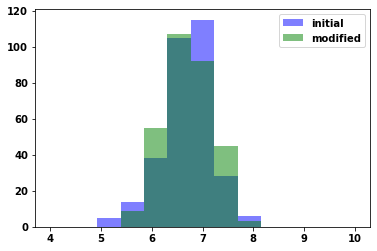

Sum of positive changes = 48.524362564086914	No. of +ves = 164
Sum of negative changes = -43.44822072982788	No. of -ves = 147


In [38]:
inact_to_act = changes.loc[(changes['Modified_pIC']>7) & (changes['Initial_pIC']<7),['Modified_pIC','Initial_pIC','Delta']].sort_values(by='Delta',ascending=False)

changes.to_csv('./past outputs/out_pIC299'+'.csv',index=False)
inact_to_act.to_csv('./past outputs/act_pIC299'+'.csv',index=False)

print(inact_to_act.head())
print(changes.head())

bins = np.linspace(4,10,14)
#changes = changes.loc[changes.Delta>0]
plt.hist(changes['Initial_pIC'], bins, alpha=0.5, label='initial',color='blue')
plt.hist(changes['Modified_pIC'], bins, alpha=0.5, label='modified',color='green')
plt.legend(loc='upper right')
plt.show()

sp = changes.loc[changes['Delta']>0].sum()['Delta']
sn = changes.loc[changes['Delta']<0].sum()['Delta']
cp = changes.loc[changes['Delta']>0].count()['Delta']
cn = changes.loc[changes['Delta']<0].count()['Delta']
print('Sum of positive changes = {}\tNo. of +ves = {}\nSum of negative changes = {}\tNo. of -ves = {}'.format(sp,cp,sn,cn))

In [44]:
df = pd.read_csv(r'C:\Users\HP\AZC_Internship\DeepFMPO\3.6\past outputs\out_pIC128.csv')
df.head()

,Initial_pIC,Modified_pIC,Initial_mol,Modified_mol,Delta
0,5.885226,7.241144,NC(=O)c1ccc(N2CCC(c3cccc(C(F)(F)F)c3)C(N)C2)c2...,NC(=O)c1ccc(-[n+]2ccccc2-c2cccc([C@@H]3CCN[C@...,1.355917
1,7.076267,8.241585,CC(C)Oc1c(N)ncnc1N1CCC(c2nc(-c3cc(F)ccc3Cl)cn2...,CC(C)Oc1c(N)ncnc1N1CCC(c2cc(-c3cc(N4CCOCC4)cc...,1.165318
2,6.435828,7.570012,Nc1ncnc(C2CCN(n3cc(CCNCCCCl)nc3-c3cc(C(F)(F)F)...,Nc1ncnc([C@H]2CCCN(c3ccc(-c4cnc(-c5cn6ccncc6n...,1.134183
3,6.250791,7.378653,C[C@H]1COC[C@@H](C)N1c1nc(-c2cc(C(F)F)ncc2N)nc...,C[C@H]1COC[C@@H](C)N1c1ccc(N2[C@@H](C#N)COC[C...,1.127862
4,6.157812,7.284212,CN1CCN(c2ccc(-c3cncc(-c4ccc(C(=O)NS(C)(=O)=O)c...,Cc1cc(-n2cc(CC(C)C)c(=O)[nH]c2=O)c(-c2ccc(C(=...,1.126400


In [47]:
df[['Initial_pIC','Modified_pIC','Delta']].head()

,Initial_pIC,Modified_pIC,Delta
0,5.885226,7.241144,1.355917
1,7.076267,8.241585,1.165318
2,6.435828,7.570012,1.134183
3,6.250791,7.378653,1.127862
4,6.157812,7.284212,1.126400
